In [1]:
import pandas as pd, numpy as np
import warnings
warnings.filterwarnings("ignore")

# 数据预探索与预处理

In [3]:
df1 = pd.read_csv(r"C:\Users\CDA\data\ma_resp_data_temp.csv")
df1.head()

,KBM_INDV_ID,resp_flag,GEND,CA00,CA03,CA06,CA11,CA16,AART,ADBT,...,c210pmr,c210poo,c210psu,c210pwc,c210wht,ilor,meda,pdpe,tins,zhip19
0,281478,0,M,4,0,5,1,1,N,N,...,52,65,71.0,22,79.0,15.0,64.0,42,8,8
1,290485,0,M,0,0,0,0,0,N,N,...,44,81,99.0,37,65.0,17.0,61.0,46,6,3
2,299949,0,F,0,0,0,0,0,N,N,...,38,44,62.0,44,47.0,20.0,61.0,46,7,3
3,314635,0,F,0,4,0,0,0,N,N,...,45,71,99.0,39,71.0,4.0,62.0,37,8,9
4,363702,0,F,0,0,0,0,0,N,N,...,32,13,36.0,15,65.0,9.0,NaN,37,4,3


In [4]:
del df1["KBM_INDV_ID"]

In [8]:
describe = df1.describe().T.round(2)
describe

,count,mean,std,min,25%,50%,75%,max
resp_flag,43666.0,0.40,0.49,0.0,0.0,0.0,1.0,1.0
CA00,43666.0,0.27,1.00,0.0,0.0,0.0,0.0,6.0
CA03,43666.0,0.21,0.89,0.0,0.0,0.0,0.0,7.0
CA06,43666.0,0.38,1.18,0.0,0.0,0.0,0.0,7.0
CA11,43666.0,0.31,1.05,0.0,0.0,0.0,0.0,7.0
CA16,43666.0,0.22,0.86,0.0,0.0,0.0,0.0,7.0
LIVEWELL,43661.0,2.84,1.17,1.0,2.0,3.0,4.0,6.0
NOC19,43666.0,0.47,1.05,0.0,0.0,0.0,0.0,9.0
NAH19,43666.0,2.08,1.22,0.0,1.0,2.0,3.0,9.0
NPH19,43666.0,2.55,1.90,0.0,1.0,2.0,3.0,16.0


In [71]:
null_lable = describe["count"].astype(int).sort_values(ascending=False)[-1:-12:-1].index.tolist()
null_lable

['c210psu',
 'c210hva',
 'c210mah',
 'meda',
 'c210wht',
 'c210hmi',
 'ilor',
 'LIVEWELL',
 'c210b200',
 'age',
 'c210cip']

In [101]:
null_ratio = df1[null_lable].isnull().sum()*100/43666
null1 = pd.DataFrame(null_ratio.round(2))
null1

,0
c210psu,0.05
c210hva,0.03
c210mah,0.03
meda,0.03
c210wht,0.03
c210hmi,0.02
ilor,0.01
LIVEWELL,0.01
c210b200,0.01
age,0.00


In [112]:
null2 = pd.DataFrame(df1[null_lable].dtypes)
null2

,0
c210psu,float64
c210hva,float64
c210mah,float64
meda,float64
c210wht,float64
c210hmi,float64
ilor,float64
LIVEWELL,float64
c210b200,float64
age,float64


In [141]:
null = pd.concat([null1,null2],axis=1)
null.columns=["null_ratio","dtypes"]
null.reset_index(drop=True)
null["Var"]=null.index
index =list(int(range(11)))
null = null[["Var","null_ratio","dtypes"]].index=index
null

TypeError: int() argument must be a string, a bytes-like object or a number, not 'range'

In [95]:
df1.age.fillna(df1.age.median(),inplace=True)

In [97]:
df1.loc[]

0        67.0
1        76.0
2        67.0
3        71.0
4        75.0
         ... 
43661    65.0
43662    70.0
43663    65.0
43664    75.0
43665    76.0
Name: age, Length: 43666, dtype: float64

# 可视化

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')
# 支持中文
plt.rcParams['font.sans-serif']=['SimHei']# 支持中文
plt.rcParams['axes.unicode_minus'] = False #正常显示字符

ValueError: array must not contain infs or NaNs

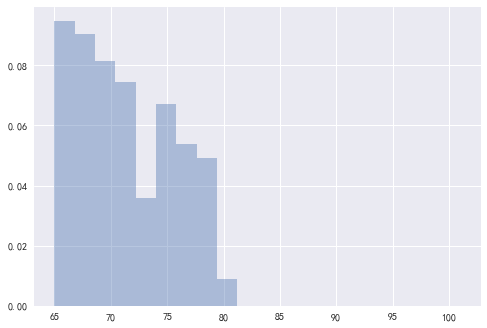

In [90]:
plt.figure
sns.distplot(df1["age"],bins=20)
plt.show()